In [1]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
import spacy
nlp=spacy.load('en')
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
tknzr = WordPunctTokenizer()
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
# np.set_printoptions(precision=4)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import names
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

/home/sysadmin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(normalize(model[word[0]]) - normalize(model[word[1]])))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def storyv(model,words):
    veclist=[]
    for w in words:
        if w in model.wv.vocab:
            veclist.append(normalize(model[w]))
    storyv=normalize(np.mean(veclist,axis=0))
    return storyv

def projection(storyv, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(storyv, culturev))
           
def cosine2angle(i):
    return np.arccos(i) / np.pi * 180 #长度换角度

def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

def normalization(x):
    x=np.array(x)
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [3]:
swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad'],
    ['joy', 'sorrow'],
    ['smile', 'tear']
] # success words

In [4]:
# Load Google's pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

In [6]:
# success_vector = cultureD2(model, swords)
# success_word = [i[0] for i in model.similar_by_vector(success_vector, 1)]

In [7]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [8]:
def main_character(lead):
    lead=[i.title() for i in lead]
    film_name_list = (set(lead) & set(male_names)) |\
                    (set(lead) & set(female_names))
    film_script_wordlist_counter = Counter(lead)
    df = pd.DataFrame([[i, film_script_wordlist_counter[i]] for i in film_name_list]\
                                      , columns=['name', 'count'])
    df['gender']=df['name'].apply(lambda x:'male' if x in male_names else 'female')
    df=df.sort_values(by='count', ascending=False)
    lead = df['name'].values[0]
    lead_gender=df['gender'].values[0]
    if lead_gender=='female':
        lead1=df[df['gender']=='male']['name'].values[0]
    else:
        lead1=df[df['gender']=='female']['name'].values[0]
    return lead,lead_gender,lead1

In [8]:
# data=pd.read_csv('./gender.txt',sep=',',names=['name','gender'])
# data=data.dropna(axis=0,how='any')
# data['name']=data['name'].apply(lambda x:x.title() if type(x)==str else print(x))
# male_names=data[data['gender']=='male']['name'].values
# female_names=data[data['gender']=='female']['name'].values
# all_names=data['name'].values

In [2]:
# data=pd.read_csv('./gutenberg/metadata.csv')
# data=data[data['lang']=='English']
# data['class']=data['loc_class'].apply(lambda x: [i[0] for i in x.split('|') if i[0] in [str(chr(i)) for i in range(65,91)]])
# data['judge']=data['class'].apply(lambda x:True if 'P' in x else False)
# data=data[data['judge']==True]

In [9]:
# 获取名字，性别数据列表
from nltk.corpus import names
male_names = [name for name in names.words('male.txt')]
female_names = [name for name in names.words('female.txt')]
names = male_names+female_names

In [10]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()
stopword=[i.split('\n')[0] for i in stopword]

In [11]:
def get_maintext_lines_gutenberg(raw_text):
    lines = raw_text.split("\n")
    start_book_i = 0
    end_book_i = len(lines)-1
    # pass 1, this format is easy and gets 78.9% of books
    start1="START OF THIS PROJECT GUTENBERG EBOOK"
    start2="START OF THE PROJECT GUTENBERG EBOOK"
    end1="END OF THIS PROJECT GUTENBERG EBOOK"
    end2="END OF THE PROJECT GUTENBERG EBOOK"
    end3="END OF PROJECT GUTENBERG"
    for j,line in enumerate(lines):
        if (start1 in line) or (start2 in line):
            # and "***" in line and start_book[i] == 0 and j<.25*len(lines):
            start_book_i = j
        end_in_line = end1 in line or end2 in line or end3 in line.upper()
        if end_in_line and (end_book_i == (len(lines)-1)):
            #  and "***" in line and j>.75*len(lines)
            end_book_i = j
    # pass 2, this will bring us to 99%
    if (start_book_i == 0) and (end_book_i == len(lines)-1):
        for j,line in enumerate(lines):
            if ("end" in line.lower() or "****" in line) and  "small print" in line.lower() and j<.5*len(lines):
                start_book_i = j
            if "end" in line.lower() and "project gutenberg" in line.lower() and j>.75*len(lines):
                end_book_i = j
        # pass three, caught them all (check)
        if end_book_i == len(lines)-1:
            for j,line in enumerate(lines):
                if "THE END" in line and j>.9*len(lines):
                    end_book_i = j
    return lines[(start_book_i+1):(end_book_i)]

In [12]:
def chunkify(lines):
    # put them back together...
    raw_text = "\n".join(lines)
    # remove extra whitespace
    raw_text_1 = re.sub("\n[\\s]+?\n","\n\n",raw_text)
    # remove singleton newlines
    raw_text_2 = re.sub(r"([^\n])\n([^\n])",r"\1 \2",raw_text_1)
    raw_text_3 = raw_text_2.rstrip().lstrip()

    # three levels of significance
    # single newlines were already discarded (insignificant)
    # double newlines are real line breaks
    # triple newlines (or more) separate content

    # split on those triples (or more)
    big_chunks = re.split("\n\n\n+",raw_text_3)

    # now break them into the paragraphs
    small_chunks = list(map(lambda x: re.split("\n\n",x),big_chunks))
    combined_chunks = []
    [combined_chunks.extend(el) for el in small_chunks]
#     combined_chunks = []

#     for i in range(len(small_chunks)):
#         for j in range(len(small_chunks[i])):
#             combined_chunks.append((i,j,small_chunks[i][j]))
    return combined_chunks
#     return small_chunks

In [22]:
# import os,shutil
# for filename in nos:
#     filename=os.path.join('./book/',str(filename)+'.txt')
#     if os.path.exists(filename):
#         shutil.copy(filename,'./books/')

In [15]:
# names=[]
# for i in range(len(nos)):
#     flushPrint(i)
#     try:
#         f = open('./gutenberg/'+str(nos[i])+'.txt',"r",encoding='ISO-8859-1')
#         rawtext = f.read()
#         f.close()
#         lines = get_maintext_lines_gutenberg(rawtext)
#         chunked = chunkify(lines)
#         chunks_nlp = list(map(lambda x: [x[0],x[1],nlp(x[2]),x[2]],chunked))
#         all_word_list = []
#         w=[]
#         for da in chunks_nlp:
#             d=[]
#             for word in da[2]:
#                 try:
#                     word=str(word)
#                     all_word_list.append(word)
#                     if (word.lower() not in stopword)&(word not in all_names):
#                         sim = 90-cosine2angle(projection(model[str(word)],success_vector))
#                         if (sim<-5)|(sim>5):
#                             d.append(sim)
#                 except Exception as e:
#                     pass
#             w.append(np.mean(d))
#         w=[0 if np.isnan(i)==True else i for i in w]
#         lead,lead_gender,lead1=main_character(all_word_list)
#         tp=[i for i,j in enumerate(chunks_nlp) if (lead in [str(a) for a in j[2]]) & (lead1 in [str(a) for a in j[2]])]
#         names.append([nos[i],w,tp])
#     except Exception as e:
#         print(e)
#         pass

In [16]:
# file=[i[0] for i in names]
# emotion=[i[1] for i in names]
# tp=[i[2] for i in names]

# diction1=dict(zip(file,tp))
# diction2=dict(zip(file,emotion))

# book_list['tp']=book_list['id'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
# book_list['emotion']=book_list['id'].apply(lambda x: diction2[x] if x in diction2 else np.nan)

# book_list.to_csv('./book_list1.csv',index=False)

In [17]:
# f = open('./gutenberg/'+str(1260)+'.txt',"r",encoding='ISO-8859-1')
# rawtext = f.read()
# f.close()
# lines = get_maintext_lines_gutenberg(rawtext)
# chunked = chunkify(lines)
# chunks_nlp = list(map(lambda x: [x[0],x[1],nlp(x[2]),x[2]],chunked))
# all_word_list = []
# w=[]
# for da in chunks_nlp:
#     d=[]
#     for word in da[2]:
#         try:
#             word=str(word)
#             all_word_list.append(word)
#             if (word.lower() not in stopword)&(word not in all_names):
#                 sim = 90-cosine2angle(projection(model[str(word)],success_vector))
#                 if (sim<-5)|(sim>5):
#                     d.append(sim)
#         except Exception as e:
#             pass
#     w.append(np.mean(d))
# w=[0 if np.isnan(i)==True else i for i in w]

In [20]:
# cum_e=np.cumsum(normalized(w))

In [33]:
# lead,lead_gender,lead1=main_character(all_word_list)
# tp=[i for i,j in enumerate(chunks_nlp) if ('Rochester' in j[-1]) & ('Jane' in j[-1])]

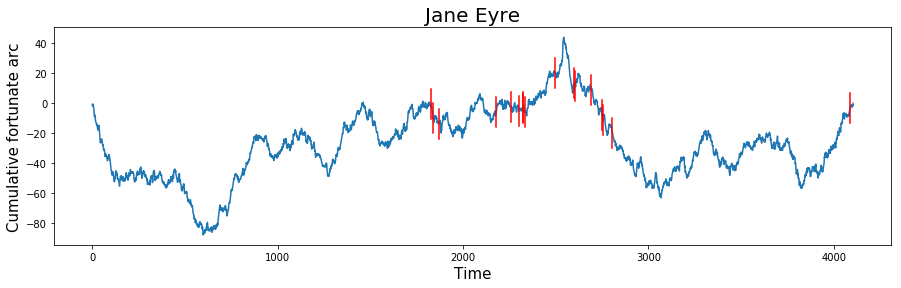

In [36]:
# fig = plt.figure(figsize=(15,4))
# plt.plot(range(len(w)),np.cumsum(normalized(w)))
# # plt.plot([0,len(w)],[0,0])
# for i in tp:
#     plt.plot([i,i],[cum_e[i]-10,cum_e[i]+10],color='r')
# # for i in b:
# #     if len(i)>1:
# #         x=[j[0] for j in i]
# #         y=[j[1] for j in i]
# #         poly = np.polyfit(x,y,deg=1)
# #         z = np.polyval(poly, x)
# #         plt.annotate("%s" % poly, xy=(x[-1]-1,y[-1]-1))
# #         plt.plot(x, z,color='black')
# plt.ylabel('Cumulative fortunate arc',fontsize=15)
# plt.xlabel('Time',fontsize=15)
# plt.title('Jane Eyre',fontsize=20)
# plt.show()

In [57]:
# def word_to_emotion(data):
#     da=tknzr.tokenize(data)
#     d=[]
#     for word in da:
#         try:
#             if (word.lower() not in stopword) & (word.title() not in all_names):
#                 sim = diction[word]
#                 if (sim<-3)|(sim>3):
#                     d.append(sim)
#         except:
#             pass
#     return np.mean(d)

In [42]:
# f = open('./gutenberg/'+str(222)+'.txt',"r",encoding='ISO-8859-1')
# rawtext = f.read()
# f.close()
# lines = get_maintext_lines_gutenberg(rawtext)
# chunked = chunkify(lines)
# chunks_nlp = list(map(lambda x: [x[0],x[1],nlp(x[2]),x[2]],chunked))
# all_word_list = []
# w=[]
# for da in chunks_nlp:
#     d=[]
#     for word in da[2]:
#         try:
#             word=str(word)
#             all_word_list.append(word)
#             if (word.lower() not in stopword)&(word not in all_names):
#                 sim = 90-cosine2angle(projection(model[str(word)],success_vector))
#                 if (sim<-5)|(sim>5):
#                     d.append(sim)
#         except Exception as e:
#             pass
#     w.append(np.mean(d))
# w=[0 if np.isnan(i)==True else i for i in w]

/home/sysadmin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sysadmin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [43]:
# cum_e=np.cumsum(normalized(w))

In [51]:
# lead,lead_gender,lead1=main_character(all_word_list)
# tp=[i for i,j in enumerate(chunks_nlp) if ('Strickland' in j[-1]) & ('Ata' in j[-1])]

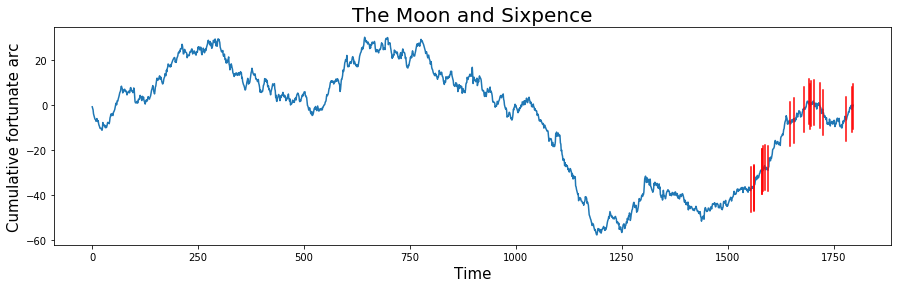

In [53]:
# fig = plt.figure(figsize=(15,4))
# plt.plot(range(len(w)),np.cumsum(normalized(w)))
# # plt.plot([0,len(w)],[0,0])
# for i in tp:
#     plt.plot([i,i],[cum_e[i]-10,cum_e[i]+10],color='r')
# # for i in b:
# #     if len(i)>1:
# #         x=[j[0] for j in i]
# #         y=[j[1] for j in i]
# #         poly = np.polyfit(x,y,deg=1)
# #         z = np.polyval(poly, x)
# #         plt.annotate("%s" % poly, xy=(x[-1]-1,y[-1]-1))
# #         plt.plot(x, z,color='black')
# plt.ylabel('Cumulative fortunate arc',fontsize=15)
# plt.xlabel('Time',fontsize=15)
# plt.title('The Moon and Sixpence',fontsize=20)
# plt.show()

In [19]:
import json
with open("diction.txt","r") as f:
    ediction = json.loads(f.readline())

In [81]:
book=book[book['no'].isin(nos)]

In [83]:
len(book)

1326

In [106]:
# with open('./book/'+str(nos[0])+'.txt',"r") as f:
#     a=f.readlines()
# w=[]
# for j in a:
#     j=j.replace('\n','')
#     c=[i for i in j.split('\t') if (i.split('_')[0].lower() not in stopword)&\
#        (i.split('_')[0].title() not in all_names)]
#     c=[i.split('_')[1] for i in c]
#     c=[int(re.sub("\D", "", i)) for i in c]
#     c=[i for i in c if (i<-3)|(i>3)]
#     w.append(np.mean(c))

In [119]:
characters=[]
for m,n in enumerate(nos):
    flushPrint(m)
    try:
        f = open('./gutenberg/'+str(n)+'.txt',"r",encoding='ISO-8859-1')
        rawtext = f.read()
        f.close()
        lines = get_maintext_lines_gutenberg(rawtext)
        chunked = chunkify(lines)
#         chunks_nlp = list(map(lambda x: [x[0],x[1],nlp(x[2]),x[2]],chunked))
#         all_word_list = []
#         w=[]
#         for da in chunks_nlp:
#             w.append(np.mean(word_to_emotion(da[2])))
#         w=[0 if np.isnan(i)==True else i for i in w]
        article=nlp(rawtext)
        items = [x.text for x in article.ents if x.label_=='PERSON']
        lead,lead_gender,lead1=main_character(items)
        tp=[i for i,j in enumerate(chunked) if (lead in tknzr.tokenize(j)) & (lead1 in tknzr.tokenize(j))]
        characters.append([n,lead,lead_gender,lead1,tp])
    except Exception as e:
        print(e,n)
        pass

1[Errno 2] No such file or directory: './gutenberg/84.txt' 84
2[Errno 2] No such file or directory: './gutenberg/74.txt' 74
7index 0 is out of bounds for axis 0 with size 0 42
18[Errno 2] No such file or directory: './gutenberg/863.txt' 863
30[Errno 2] No such file or directory: './gutenberg/1524.txt' 1524
34[Errno 2] No such file or directory: './gutenberg/4217.txt' 4217
37[Errno 2] No such file or directory: './gutenberg/1155.txt' 1155
39[Errno 2] No such file or directory: './gutenberg/696.txt' 696
81[Errno 2] No such file or directory: './gutenberg/269.txt' 269
84[Errno 2] No such file or directory: './gutenberg/1695.txt' 1695
93[Errno 2] No such file or directory: './gutenberg/854.txt' 854
99[Errno 2] No such file or directory: './gutenberg/19994.txt' 19994
110[Errno 2] No such file or directory: './gutenberg/43.txt' 43
128[Errno 2] No such file or directory: './gutenberg/501.txt' 501
129[Errno 2] No such file or directory: './gutenberg/3188.txt' 3188
132[Errno 2] No such file or 

In [121]:
len(characters)

1251

In [126]:
file=[i[0] for i in characters]
tp=[i[-1] for i in characters]
character=[i[1:4] for i in characters]

diction1=dict(zip(file,tp))
diction3=dict(zip(file,character))

book['tp']=book['no'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
book['character']=book['no'].apply(lambda x: diction3[x] if x in diction3 else np.nan)

In [127]:
book_list1=pd.read_csv('./book_list1.csv')

In [128]:
len(book_list1)

1327

In [131]:
diction=dict(book_list1[['id','emotion']].values)

In [135]:
book['emotion']=book['no'].apply(lambda x: diction[x] if x in diction else np.nan)

In [137]:
book.to_csv('./book.csv',index=False)

In [27]:
book=pd.read_csv('./book.csv')

In [28]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [29]:
book['tp']=book['tp'].apply(lambda x: eval_(x))
book['emotion']=book['emotion'].apply(lambda x: eval_(x))
book['character']=book['character'].apply(lambda x: eval_(x))

In [30]:
book=book.dropna(axis=0,how='any',subset=['character','tp','emotion'])

In [31]:
book['cum_e']=book['emotion'].apply(lambda x: np.cumsum(normalized(x)))

In [32]:
def is_arithmetic(l): 
    if len(l)==1:
        return True
    else:
        delta = l[1] - l[0]  
        for index in range(len(l) - 1):  
            if not (np.sign(l[index + 1] - l[index]) == np.sign(delta)):  
                 return False  
    return True  

In [33]:
def extreme_v(nums):
    peaks = []
    troughs = []
    t=0
    num1=[i[0] for i in nums]
    num2=[i[1] for i in nums]
    for idx in range(1, len(num1)-1):
        if num2[idx-1]+t < num2[idx] > num2[idx+1]+t:
            peaks.append([num1[idx],num2[idx]])
        if num2[idx-1] > num2[idx]+t < num2[idx+1]:
            troughs.append([num1[idx],num2[idx]])
    a=sorted(peaks+troughs,key=lambda x: x[0])
    a=[nums[0]]+a+[nums[-1]]
    b=[a[i+1] for i in range(1,len(a)-1) if (a[i+1][0]-a[i][0]==1)&(abs(a[i+1][1]-a[i][1])<t)]
    a=[i for i in a if i not in b]
#     print(a)
    return a

In [34]:
def t_p(nums):
    try:
        peaks = []
        troughs = []
        for idx in range(1, len(nums)-1):
            if nums[idx-1] < nums[idx] > nums[idx+1]:
                peaks.append(idx)
            if nums[idx-1] > nums[idx] < nums[idx+1]:
                troughs.append(idx)
        if len(peaks)<len(troughs):
            peaks=peaks+[len(nums)-1]
        elif len(peaks)>len(troughs):
            troughs=[0]+troughs
        else:
            if peaks[0]<troughs[0]:
                peaks=peaks+[len(nums)-1]
                troughs=[0]+troughs
        a=[[i,nums[i]] for i in troughs]
        b=[[i,nums[i]] for i in peaks]
        c=[i for i in list(zip(a,b))]
        return c
    except  Exception as e:
        return np.nan
        pass

In [35]:
def tp_e(cum_e,tp):
    tp_e=[[i,cum_e[i]] for i in tp]
    return tp_e

In [36]:
book['tp_e']=book.apply(lambda row: tp_e(row.cum_e,row.tp),axis=1)

In [37]:
def tp_c(tp_e,w): #non-normalize
    try:
        a=[]
        for i in range(len(tp_e)-1):
            if (tp_e[i+1][0]-tp_e[i][0])>len(w)/15:
                a.append(i+1)

        a=[0]+a+[len(tp_e)]

        b=[]
        for i in range(len(a)-1):
            if is_arithmetic([i[1] for i in tp_e[a[i]:a[i+1]]])==True:
                b.append(tp_e[a[i]:a[i+1]])
            else:
                extreme=extreme_v(tp_e[a[i]:a[i+1]])
                index=[tp_e.index(i) for i in extreme]
        #         print([i[0] for i in extreme])
                q=index[0]
                for j in range(1,len(index)-1):
                    if (tp_e[index[j]][0]-tp_e[index[j]-1][0])>=(tp_e[index[j]+1][0]-tp_e[index[j]][0]):
                        b.append(tp_e[q:index[j]])
                        q=index[j]
                    else:
                        b.append(tp_e[q:index[j]+1])
                        q=index[j]+1
                b.append(tp_e[q:index[-1]+1])

        b=[i for i in b if len(i)!=0]

        for i in range(len(b)-1):
            if (len(b[i])==1)&(b[i+1][0][0]-b[i][0][0]==1):
                b[i+1]=b[i]+b[i+1]
                b[i]=[]
        b=[i for i in b if len(i)!=0]
        if len(b)>1:
            if (len(b[-1])==1)&(b[-1][0][0]-b[-2][-1][0]==1):
                b[-2]=b[-2]+b[-1]
                b[-1]=[]
            b=[i for i in b if len(i)!=0]
        return b
        
    except Exception as e:
        return np.nan
        pass

In [38]:
book['tp_c']=book.apply(lambda row: tp_c(row.tp_e,row.emotion),axis=1)

In [39]:
def k(b):
    try:
        a=[]
        for i in b:
            if len(i)==0:
                continue
            if len(i)==1:
                a.append([0,1])
            if len(i)>1:
                x=[j[0] for j in i] #non_normalize
                y=[j[1] for j in i] #non_normalize
                poly = np.polyfit(x,y,deg=1)
                a.append([poly[0],[x[0],x[-1]]])
#                 a.append([poly[0],len(x)]) #number
#                 a.append([poly[0],x[-1]-x[0]]) #length
#                 a.append(poly[0])
        return a
    except Exception as e:
        return np.nan
        pass
book['k']=book['tp_c'].apply(lambda x: k(x))

In [40]:
def up(x):
    b=[]
    for i in x:
        b.extend(range(i[0],i[1]+1))
    return b

In [41]:
book=book.dropna(axis=0,how='any',subset=['k'])

In [42]:
len(book)

935

In [43]:
book['up']=book['k'].apply(lambda x: [i[1] for i in x if i[0]>0])
book['up']=book['up'].apply(lambda x: up(x))

In [45]:
book.to_csv('./book.csv',index=False)